# File Storage

Currently, the State University can store 200 files on hard disk,
100 files in computer memory, and 300 files on the cloud.
Users want to store 300 word-processing files, 100 packaged-program files,
and 100 data files.
Each month a typical word-processing file is accessed 8 times,
a typical packaged-program file 4 times, and a typical data file 2 times.
When a file is accessed, the time is takes for the file to be retrieved
depends on the type of file and the storage medium:<br>

|         |Word-Proc|Package-Prog|Data|
|---------|---------|------------|----|
|Hard Disk|5        |4           |4   |
|Memory   |2        |1           |1   |
|Cloud    |10       |8           |6   |

### The goal is to minimize the total time per month that users spend accessing their files.  Determine where files should be stored.

In [1]:
# Load the gams extension
%load_ext gams_magic

__The GAMS Model:__

In [2]:
%%gams

Set
    medium 'medium to process file' / Hard_Disk, Memory, Cloud /,
    ftype 'type of file' / Word_Proc, Package_Prog, Data /;
    
Table time(medium,ftype) 'the time it takes for the file to be retrieved'
               Word_Proc Package_Prog Data
    Hard_Disk   5           4         4
    Memory      2           1         1
    Cloud       10          8         6;

Parameter space(medium) 'Current store capacity'  / Hard_Disk  200,
                                                    Memory     100,
                                                    Cloud      300 /;

Parameter users(ftype) 'Users demand for storage'  / Word_Proc       300,
                                                     Package_Prog    100,
                                                     Data            100 /;
                                            
Parameter  access(ftype) 'typical access for each type of file'   / Word_Proc       8,
                                                                    Package_Prog    4,
                                                                    Data            2 /;
                                                                
Variables
    x(medium,ftype)      'amount of the file ftype processed by i'
    z                    'total time';
   
Positive Variable x;

Equation
    space_max(medium) 'Currently, the State University can store'
    users_demand(ftype) 'Users want to store'
    obj 'calculate the cost of the optimal steel composition'
    ;
    
    space_max(medium).. sum(ftype, x(medium,ftype)) =l= space(medium);
    users_demand(ftype).. sum(medium,x(medium,ftype)) =e= users(ftype);
    obj.. sum((medium,ftype), x(medium,ftype)*time(medium,ftype)*access(ftype))=e= z;

model prob /all/;
Options LP  = Cplex;
Solve prob using LP minimizing z;
display z.l, x.l;


,Solver Status,Model Status,Objective,#equ,#var,Model Type,Solver,Solver Time
0,Normal (1),Optimal Global (1),14000.0,7,10,LP,CPLEX,0


__Pull the variable values from GAMS and display in bar chart:__

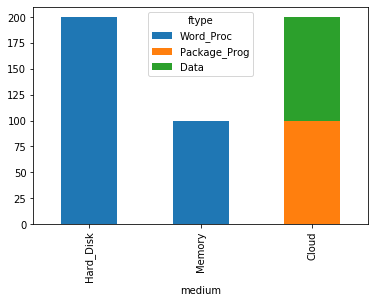

In [5]:
# Pull the values of x from GAMS to Python as a pandas dataframe
%gams_pull -d x

results = x.groupby(['medium','ftype'],sort=False)['level'].sum().unstack(level=1).plot(kind='bar',stacked=True)
